<a href="https://colab.research.google.com/github/shreyasbkgit/dllab/blob/main/Week1_Single_Unit_Perceptron_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a. Design a single unit perceptron for classification of a linearly separable binary dataset (placement.csv)
without using pre-defined models. Use the Perceptron() from sklearn.

In [ ]:

# Single unit perceptron
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
df=pd.read_csv('dataset.csv')
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
p = Perceptron()
p.fit(X,y)
print(p.coef_)
print(p.intercept_)
z=p.score(X,y)
print("accuracy score is",z)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=2)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

Exercise:
Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined
models. Use the Perceptron() from sklearn.

In [ ]:
#hint-use make_classification() to generate binary dataset from sklearn
#Eg:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,
n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1,
random_state=41,hypercube=False,class_sep=10)

Identify the problem with single unit Perceptron. Classify using Or-, And- and Xor-ed data and analyse the result.

[[2. 2.]]
[-2.]
[[2. 2.]]
[-1.]
[[0. 0.]]
[0.]


NameError: name 'plot_decision_regions' is not defined

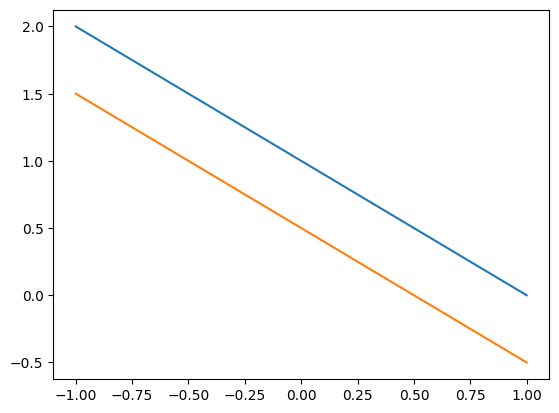

In [ ]:
# Perceptron on Or-, And- and Xor-ed data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
print(clf1.coef_)
print(clf1.intercept_)
x=np.linspace(-1,1,5)
y=-x+1
plt.plot(x,y)
#sns.scatterplot(and_data['input1'],and_data['input2'],hue=and_data['ouput'],s=200)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
print(clf2.coef_)
print(clf2.intercept_)
x1=np.linspace(-1,1,5)
y1=-x+0.5
plt.plot(x1,y1)
#sns.scatterplot(or_data['input1'],or_data['input2'],hue=or_data['ouput'],s=200)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)
print(clf3.coef_)
print(clf3.intercept_)
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values,clf=clf3, legend=2)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Accuracy: 100.00%


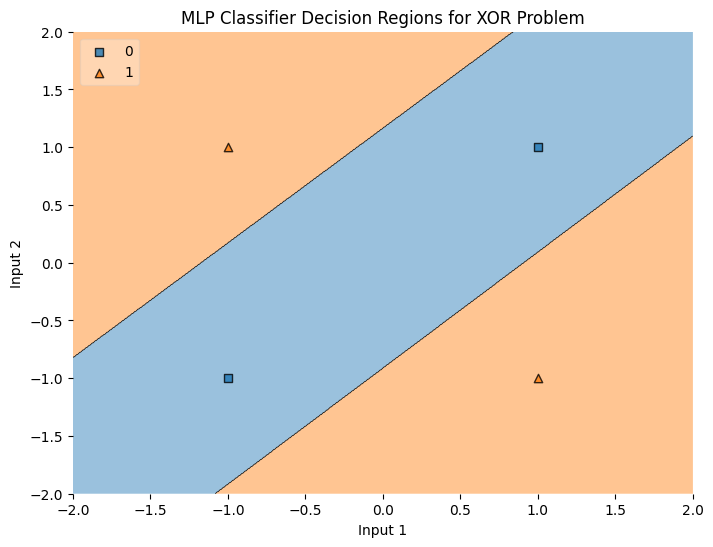

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mlp = MLPClassifier(hidden_layer_sizes=(3), activation='relu', max_iter=10000, solver='adam', random_state=42)
mlp.fit(X_scaled, y)
accuracy = mlp.score(X_scaled, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
plt.figure(figsize=(8, 6))
# Reshape y to be a 1D array
plot_decision_regions(X=X_scaled, y=y.ravel(), clf=mlp, legend=2)
plt.title('MLP Classifier Decision Regions for XOR Problem')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()

Model Accuracy: 95.50%


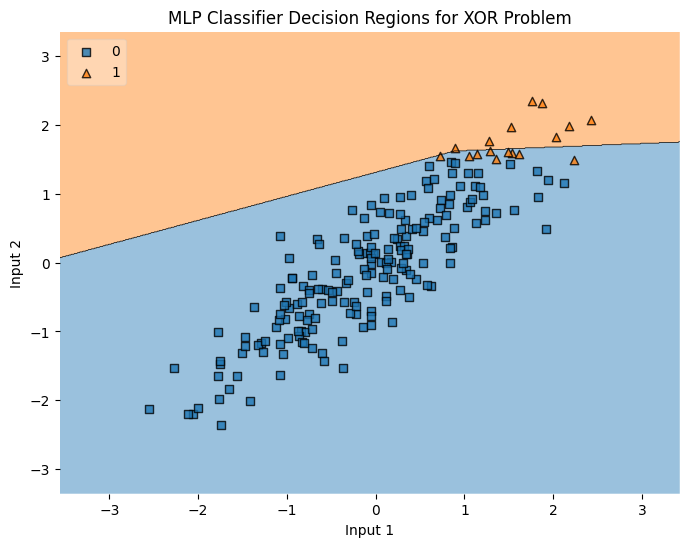

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd

data = pd.read_csv('placement.csv')
X = data.iloc[:, 0:2]

# Assuming 'package' column needs to be converted to binary labels
# Adjust the threshold (4.0 in this example) as per your problem
y = (data['package'] > 4.0).astype(int) # Convert package to binary classes based on threshold
                                        #  values greater than 4.0 is 1, otherwise 0.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mlp = MLPClassifier(hidden_layer_sizes=(3), activation='relu', max_iter=10000, solver='adam', random_state=42)
mlp.fit(X_scaled, y)
accuracy = mlp.score(X_scaled, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
plt.figure(figsize=(8, 6))
# Convert y to a NumPy array before passing it to plot_decision_regions
plot_decision_regions(X=X_scaled, y=y.values, clf=mlp, legend=2)
plt.title('MLP Classifier Decision Regions for XOR Problem')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()